In [ ]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!pip install pyspark

In [ ]:
import os

# Correct the SPARK_HOME environment variable
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/usr/local/lib/python3.11/dist-packages/pyspark" # Update this to your spark installation path
# if your spark installation path is different, change it accordingly like /opt/spark.
# find spark installation path by running `!pip show pyspark`

In [ ]:
import pyspark

print("PySpark Version:", pyspark.__version__)

PySpark Version: 3.5.4


In [ ]:
from pyspark.sql import SparkSession

spark = SparkSession.builder.master("local[*]").getOrCreate()

In [ ]:
# Create a DataFrame
data = [("James", "Smith", "USA", 40),
        ("Michael", "Rose", "USA", 35),
        ("Robert", "Williams", "USA", 50),
        ("Maria", "Jones", "USA", 30)
       ]

columns = ["firstname", "lastname", "country", "age"]
df = spark.createDataFrame(data, schema=columns)

# Show the DataFrame
df.show()

+---------+--------+-------+---+
|firstname|lastname|country|age|
+---------+--------+-------+---+
|    James|   Smith|    USA| 40|
|  Michael|    Rose|    USA| 35|
|   Robert|Williams|    USA| 50|
|    Maria|   Jones|    USA| 30|
+---------+--------+-------+---+



In [ ]:
filtered_df = df.filter((df.country == "USA") & (df.age > 30))

# Show the filtered DataFrame
filtered_df.show()

+---------+--------+-------+---+
|firstname|lastname|country|age|
+---------+--------+-------+---+
|    James|   Smith|    USA| 40|
|  Michael|    Rose|    USA| 35|
|   Robert|Williams|    USA| 50|
+---------+--------+-------+---+



n PySpark, the map transformation is typically used with RDDs (Resilient Distributed Datasets) to apply a function to each element of the RDD, resulting in a new RDD. When working with DataFrames, it's more common to use DataFrame operations (such as select, withColumn, filter, etc.), but sometimes you might want to work directly with RDDs to leverage low-level transformations like map.

In [ ]:
# Create an RDD
data = [("James", "Smith", "USA", 40),
        ("Michael", "Rose", "USA", 35),
        ("Robert", "Williams", "USA", 50),
        ("Maria", "Jones", "Canada", 30),
        ("Jen", "Brown", "UK", 25)
       ]

rdd = spark.sparkContext.parallelize(data)

In [ ]:
'Is Person older than 30'
# Apply map with lambda to add a new "age_group" column
rdd_mapped = rdd.map(lambda x: (x[0], x[1], x[2], x[3], "Older than 30" if x[3] > 30 else "30 or younger"))

# Collect the results to show them
rdd_mapped.collect()

[('James', 'Smith', 'USA', 40, 'Older than 30'),
 ('Michael', 'Rose', 'USA', 35, 'Older than 30'),
 ('Robert', 'Williams', 'USA', 50, 'Older than 30'),
 ('Maria', 'Jones', 'Canada', 30, '30 or younger'),
 ('Jen', 'Brown', 'UK', 25, '30 or younger')]

In [ ]:
from pyspark.sql.functions import col, when

# Create DataFrame
columns = ["firstname", "lastname", "country", "age"]
df = spark.createDataFrame(data, schema=columns)

# Add new column "age_group"
df = df.withColumn("age_group", when(col("age") > 30, "Older than 30").otherwise("30 or younger"))

df.show()

+---------+--------+-------+---+-------------+
|firstname|lastname|country|age|    age_group|
+---------+--------+-------+---+-------------+
|    James|   Smith|    USA| 40|Older than 30|
|  Michael|    Rose|    USA| 35|Older than 30|
|   Robert|Williams|    USA| 50|Older than 30|
|    Maria|   Jones| Canada| 30|30 or younger|
|      Jen|   Brown|     UK| 25|30 or younger|
+---------+--------+-------+---+-------------+



In [ ]:
rdd = spark.sparkContext.parallelize(["Hello", "World"])
rdd.saveAsTextFile("pysave.csv")
# Check the output directory for the saved text file

In [ ]:
from pyspark.sql import SparkSession

# Initialize a Spark session
spark = SparkSession.builder.master("local[*]").appName("RDD Actions").getOrCreate()

# Create an RDD
rdd = spark.sparkContext.parallelize([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])

# Collect action
print("Collect:", rdd.collect())

# Count action
print("Count:", rdd.count())

# First action
print("First:", rdd.first())

# Take action
print("Take 3:", rdd.take(3))

# Reduce action
print("Reduce (sum):", rdd.reduce(lambda x, y: x + y))

# Count by value action
print("Count by value:", rdd.countByValue())

# Save as text file action (output will be distributed across multiple part files)
output_path = "output_rdd_action"
rdd.saveAsTextFile(output_path)

# Take ordered action
print("Take ordered (3, ascending):", rdd.takeOrdered(3))

# Stop the Spark session
#spark.stop()

Collect: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
Count: 10
First: 1
Take 3: [1, 2, 3]
Reduce (sum): 55
Count by value: defaultdict(<class 'int'>, {1: 1, 2: 1, 3: 1, 4: 1, 5: 1, 6: 1, 7: 1, 8: 1, 9: 1, 10: 1})
Take ordered (3, ascending): [1, 2, 3]


In [ ]:
from pyspark.sql import SparkSession

# Initialize a Spark session
spark = SparkSession.builder.master("local[*]").appName("RDD Transformations").getOrCreate()

# Create an RDD
data = [("James", "Smith", "USA", 40),
        ("Michael", "Rose", "USA", 35),
        ("Robert", "Williams", "USA", 50),
        ("Maria", "Jones", "Canada", 30),
        ("Jen", "Brown", "UK", 25)]

rdd = spark.sparkContext.parallelize(data)

# map transformation
rdd_mapped = rdd.map(lambda x: (x[0], x[1], x[2], x[3] + 10))
print("Mapped RDD:", rdd_mapped.collect())

# filter transformation
rdd_filtered = rdd.filter(lambda x: x[3] > 30)
print("Filtered RDD:", rdd_filtered.collect())

# flatMap transformation
words_rdd = spark.sparkContext.parallelize(["hello world", "foo bar"])
rdd_flatmapped = words_rdd.flatMap(lambda x: x.split(" "))
print("FlatMapped RDD:", rdd_flatmapped.collect())

# groupByKey transformation
rdd_kv = spark.sparkContext.parallelize([('A', 1), ('B', 1), ('A', 2)])
rdd_grouped = rdd_kv.groupByKey()
print("Grouped RDD:", [(k, list(v)) for k, v in rdd_grouped.collect()])

# reduceByKey transformation
rdd_reduced = rdd_kv.reduceByKey(lambda x, y: x + y)
print("ReducedByKey RDD:", rdd_reduced.collect())

# sortByKey transformation
rdd_sorted = rdd_kv.sortByKey()
print("SortedByKey RDD:", rdd_sorted.collect())

# join transformation
rdd1 = spark.sparkContext.parallelize([('A', 1), ('B', 2)])
rdd2 = spark.sparkContext.parallelize([('A', 3), ('A', 4), ('B', 5)])
rdd_joined = rdd1.join(rdd2)
print("Joined RDD:", rdd_joined.collect())

# Stop the Spark session
#spark.stop()

Mapped RDD: [('James', 'Smith', 'USA', 50), ('Michael', 'Rose', 'USA', 45), ('Robert', 'Williams', 'USA', 60), ('Maria', 'Jones', 'Canada', 40), ('Jen', 'Brown', 'UK', 35)]
Filtered RDD: [('James', 'Smith', 'USA', 40), ('Michael', 'Rose', 'USA', 35), ('Robert', 'Williams', 'USA', 50)]
FlatMapped RDD: ['hello', 'world', 'foo', 'bar']
Grouped RDD: [('A', [1, 2]), ('B', [1])]
ReducedByKey RDD: [('A', 3), ('B', 1)]
SortedByKey RDD: [('A', 1), ('A', 2), ('B', 1)]
Joined RDD: [('B', (2, 5)), ('A', (1, 3)), ('A', (1, 4))]


Plotting

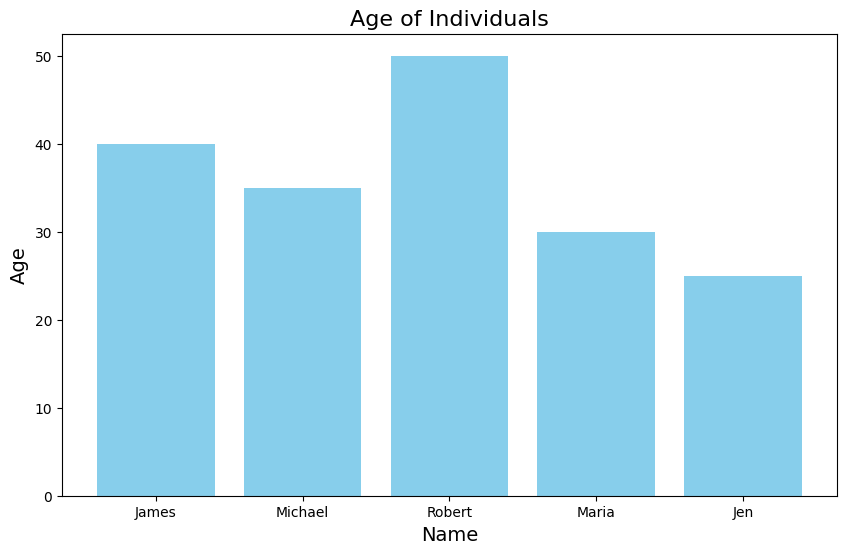

In [ ]:
# Install required packages
!pip install matplotlib pandas

# Import required libraries
from pyspark.sql import SparkSession
import matplotlib.pyplot as plt
import pandas as pd

# Initialize a Spark session
spark = SparkSession.builder.master("local[*]").appName("Plot Graphs").getOrCreate()

# Create a sample DataFrame
data = [("James", 40), ("Michael", 35), ("Robert", 50), ("Maria", 30), ("Jen", 25)]
columns = ["Name", "Age"]
df = spark.createDataFrame(data, schema=columns)

# Convert to Pandas DataFrame
pandas_df = df.toPandas()

# Plot
plt.figure(figsize=[10, 6])
plt.bar(pandas_df['Name'], pandas_df['Age'], color='skyblue')
plt.xlabel('Name', fontsize=14)
plt.ylabel('Age', fontsize=14)
plt.title('Age of Individuals', fontsize=16)
plt.show()

# Stop the Spark session
#spark.stop()

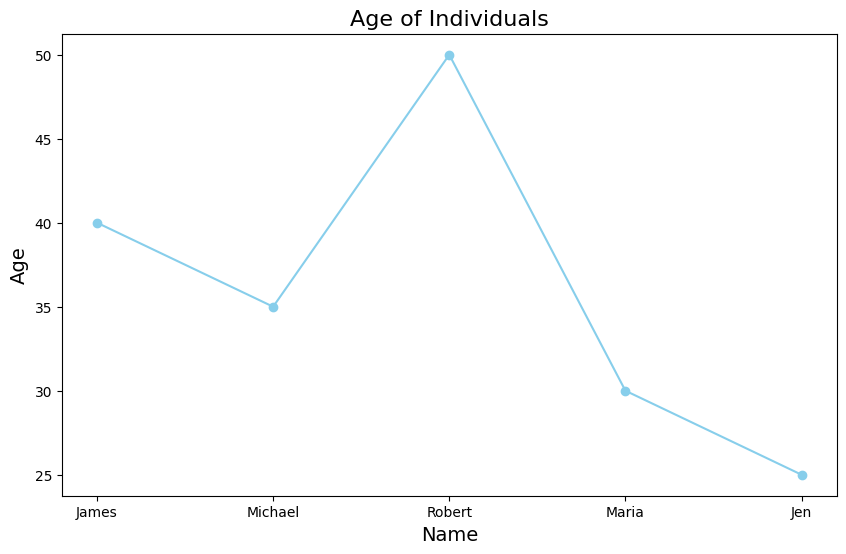

In [ ]:
# Line Plot
plt.figure(figsize=[10, 6])
plt.plot(pandas_df['Name'], pandas_df['Age'], marker='o', color='skyblue')
plt.xlabel('Name', fontsize=14)
plt.ylabel('Age', fontsize=14)
plt.title('Age of Individuals', fontsize=16)
plt.show()

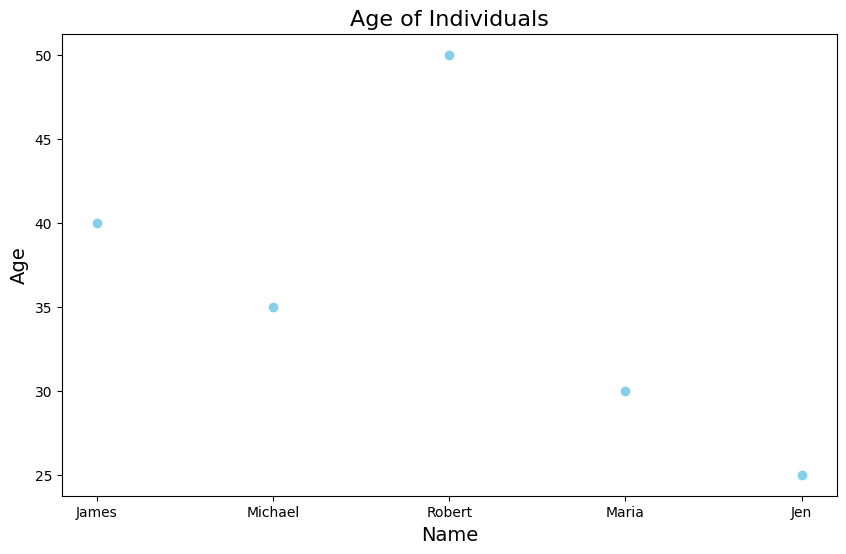

In [ ]:
# Scatter Plot
plt.figure(figsize=[10, 6])
plt.scatter(pandas_df['Name'], pandas_df['Age'], color='skyblue')
plt.xlabel('Name', fontsize=14)
plt.ylabel('Age', fontsize=14)
plt.title('Age of Individuals', fontsize=16)
plt.show()

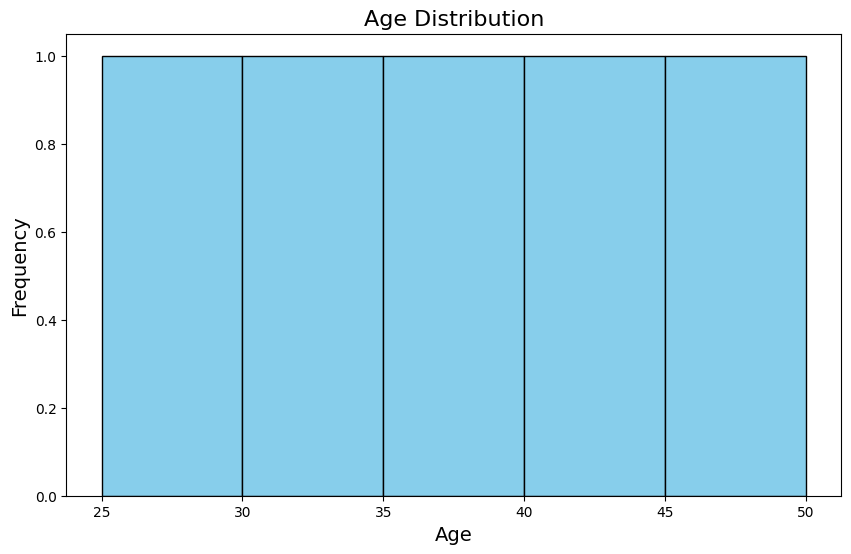

In [ ]:
# Histogram
plt.figure(figsize=[10, 6])
plt.hist(pandas_df['Age'], bins=5, color='skyblue', edgecolor='black')
plt.xlabel('Age', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Age Distribution', fontsize=16)
plt.show()

<ipython-input-30-c9a29291a1bc>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Name', y='Age', data=pandas_df, palette='Blues_d')


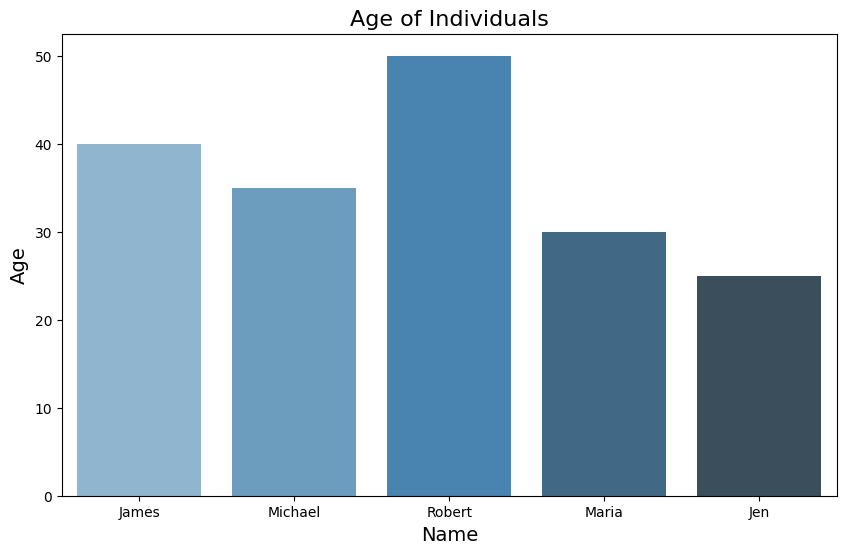

In [ ]:
!pip install seaborn

import seaborn as sns

# Bar plot using Seaborn
plt.figure(figsize=[10, 6])
sns.barplot(x='Name', y='Age', data=pandas_df, palette='Blues_d')
plt.xlabel('Name', fontsize=14)
plt.ylabel('Age', fontsize=14)
plt.title('Age of Individuals', fontsize=16)
plt.show()